# GRO620 - Activité procédurale 3

In [13]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive

## Filtrage linéaire - suite

### Q1.1

Soit cette image :

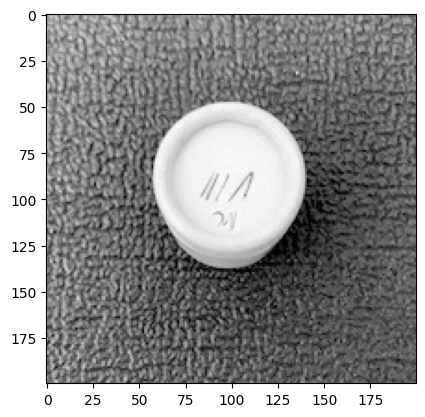

In [14]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono, cmap="gray")

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

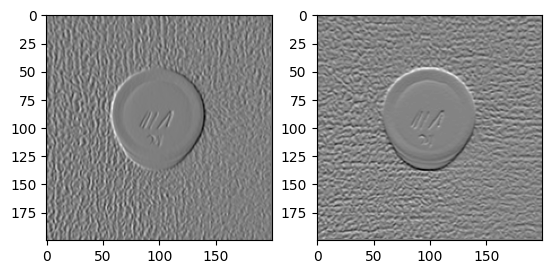

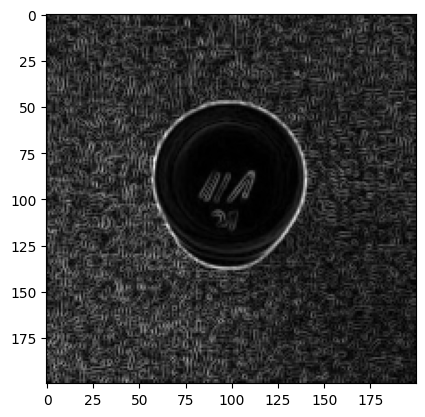

In [15]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)
# Application du filtre en x:
img_q11_sobel1 = cv2.filter2D(img_q11_mono, -1, sobel)
plt.subplot(1, 2, 1)
plt.imshow(img_q11_sobel1, cmap="gray")
img_q11_sobel2 = cv2.filter2D(img_q11_mono, -1, sobel.T)
plt.subplot(1, 2, 2)
plt.imshow(img_q11_sobel2, cmap="gray")
img_q11_sobel = np.sqrt(img_q11_sobel1**2 + img_q11_sobel2**2)
plt.figure()
plt.imshow(img_q11_sobel, cmap="gray")


## Filtrage non-linéaire

### Q2.1

Soit cette image :

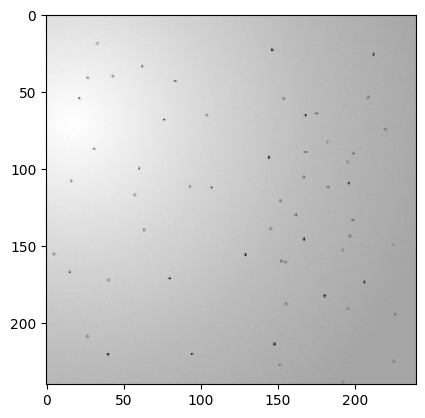

In [16]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)
plt.imshow(img_q21_mono, cmap="gray")

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

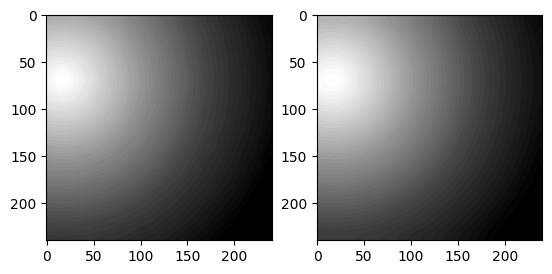

In [17]:
img_q21_filt = img_q21_mono.copy()
#median filter:
img_q21_filt = cv2.medianBlur(img_q21_filt, 15)
plt.subplot(1, 2, 1)
plt.imshow(img_q21_filt, cmap="gray")
#billateral filter:
img_q21_filt = cv2.bilateralFilter(img_q21_filt, 25, 75, 75)
plt.subplot(1, 2, 2)
plt.imshow(img_q21_filt, cmap="gray")


## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

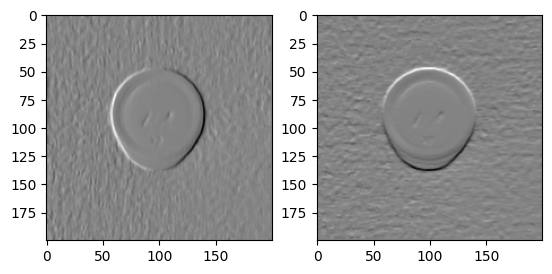

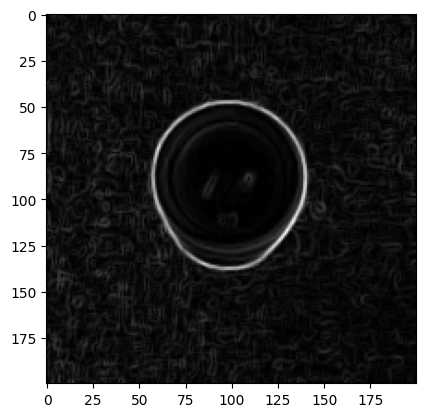

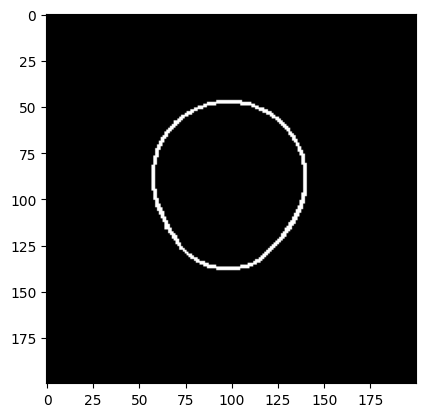

In [18]:
img_q31 = img_q11_mono.copy()
#median filter and gaussian filter:
img_q31 = cv2.medianBlur(img_q31, 5)
# img_q31 = cv2.GaussianBlur(img_q31, (5, 5), 0)

# sobel filter:
img_q31_sobel1 = cv2.filter2D(img_q31, -1, sobel)
plt.subplot(1, 2, 1)
plt.imshow(img_q31_sobel1, cmap="gray")
img_q31_sobel2  = cv2.filter2D(img_q31, -1, sobel.T)
plt.subplot(1, 2, 2)
plt.imshow(img_q31_sobel2, cmap="gray")
img_q31_filt = np.sqrt(img_q31_sobel1**2 + img_q31_sobel2**2)
plt.figure()
plt.imshow(img_q31_filt, cmap="gray")

#threshold:
img_q31_filt = cv2.threshold(img_q31_filt, 0.1, 1, cv2.THRESH_BINARY)[1]
plt.figure()
plt.imshow(img_q31_filt, cmap="gray")


### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

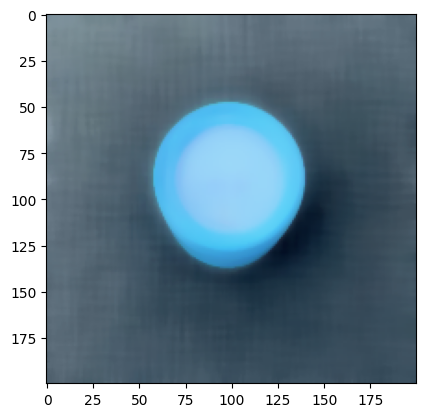

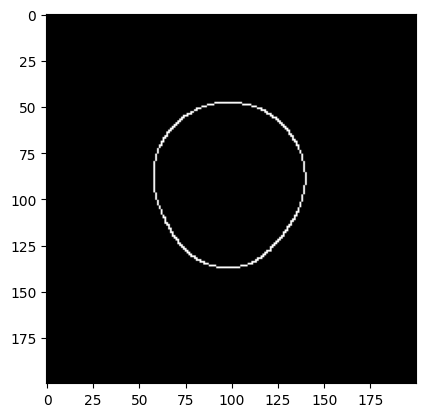

In [19]:
img_q32 = img_q11_org.copy()
# Median filter:
img_q32 = cv2.medianBlur(img_q32, 15)
plt.figure()
plt.imshow(img_q32, cmap="gray")
# Canny filter:
img_q32_filt = cv2.Canny(img_q32, 100, 220)
plt.figure()
plt.imshow(img_q32_filt, cmap="gray")




## Analyse de formes

### Q4.1

Soit cette image :

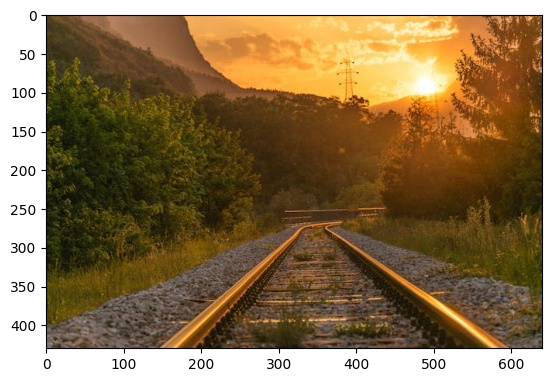

In [20]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

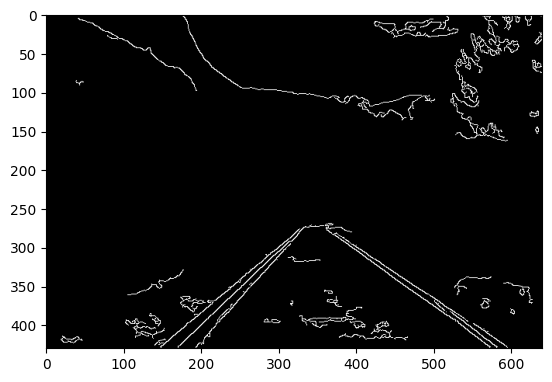

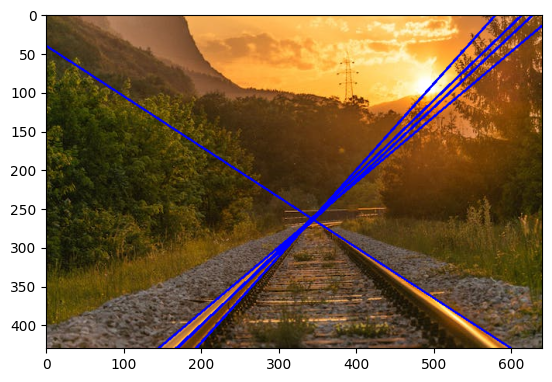

In [21]:
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_BGR2GRAY)
# Appliquer un filtre de median:
img_q41_mono = cv2.medianBlur(img_q41_mono, 5)
# Appliquer un filtre de Canny:
img_q41_filt = cv2.Canny(img_q41_mono, 50, 220, None, 3)
plt.figure()
plt.imshow(img_q41_filt, cmap="gray")
# Trouver les lignes dominantes:
lines = cv2.HoughLines(img_q41_filt, 1, np.pi/180, 150, None, 0, 0)
# Dessiner les lignes:
img_q41_out = img_q41_rgb.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_q41_out, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.figure()
plt.imshow(img_q41_out)



### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

<class 'numpy.uint8'>
Number of Contours found = 1


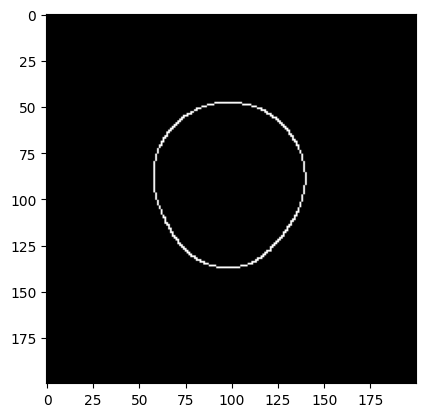

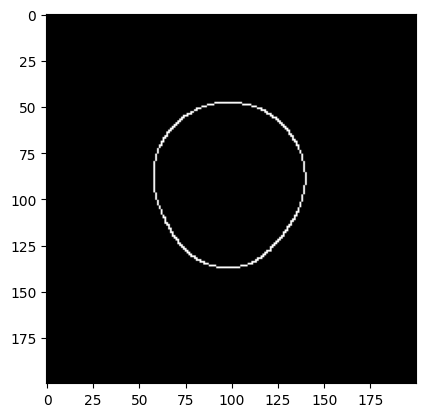

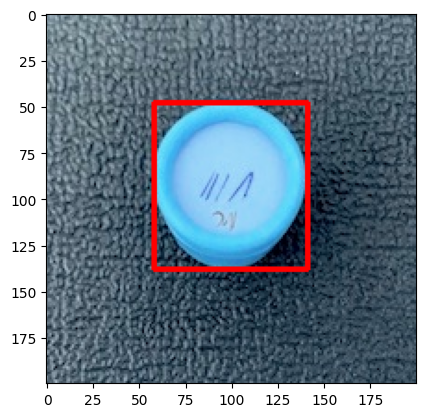

In [22]:
img_q42_out = img_q11_org.copy() # Pour le résultat
# Appliquer un filtre de median:
img_q42_filt = cv2.medianBlur(img_q42_out, 15)
# Appliquer un filtre de Canny:
img_q42_filt = cv2.Canny(img_q42_filt, 225,255)
plt.figure()
plt.imshow(img_q42_filt, cmap="gray")

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
print(type(img_q42_filt[0,0]))
contours, hierarchy = cv2.findContours(img_q42_filt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
plt.figure()
plt.imshow(img_q42_filt, cmap="gray")

print("Number of Contours found = " + str(len(contours)))

# Draw all contours with bbox:
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
for i, c in enumerate(contours):
 contours_poly[i] = cv2.approxPolyDP(c, 3, True)
 boundRect[i] = cv2.boundingRect(contours_poly[i])

 cv2.rectangle(img_q42_out, (int(boundRect[i][0]), int(boundRect[i][1])), (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), (255,0,0), 2)
plt.figure()
plt.imshow(img_q42_out)
